In [136]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [137]:
balloon = pd.read_excel("C:\\Users\\User\\Downloads\\ZYVO\\game\\Prolific_01.xlsx",sheetname='Balloon',header=0)
balloon.dtypes

ProlificId            object
Sequence               int64
ClickTime             object
Score                  int64
Round                  int64
CreatedOn     datetime64[ns]
dtype: object

In [138]:
ProlificId = list(balloon['ProlificId'].unique())
len(ProlificId)

77

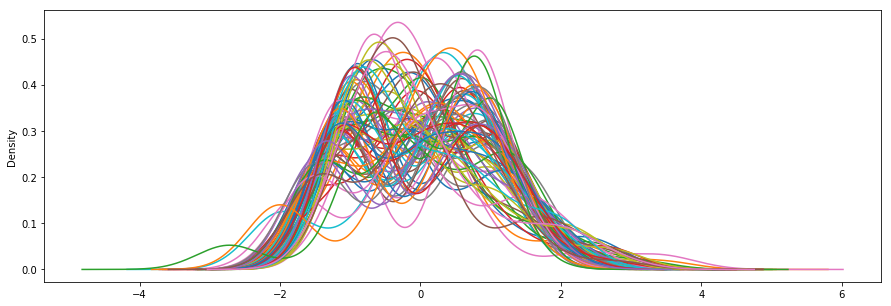

In [139]:
balloon['Zscore'] = balloon.groupby('ProlificId').Score.apply(lambda x: (x - x.mean()) / x.std())

Z = balloon.groupby('ProlificId').Zscore.plot.kde()

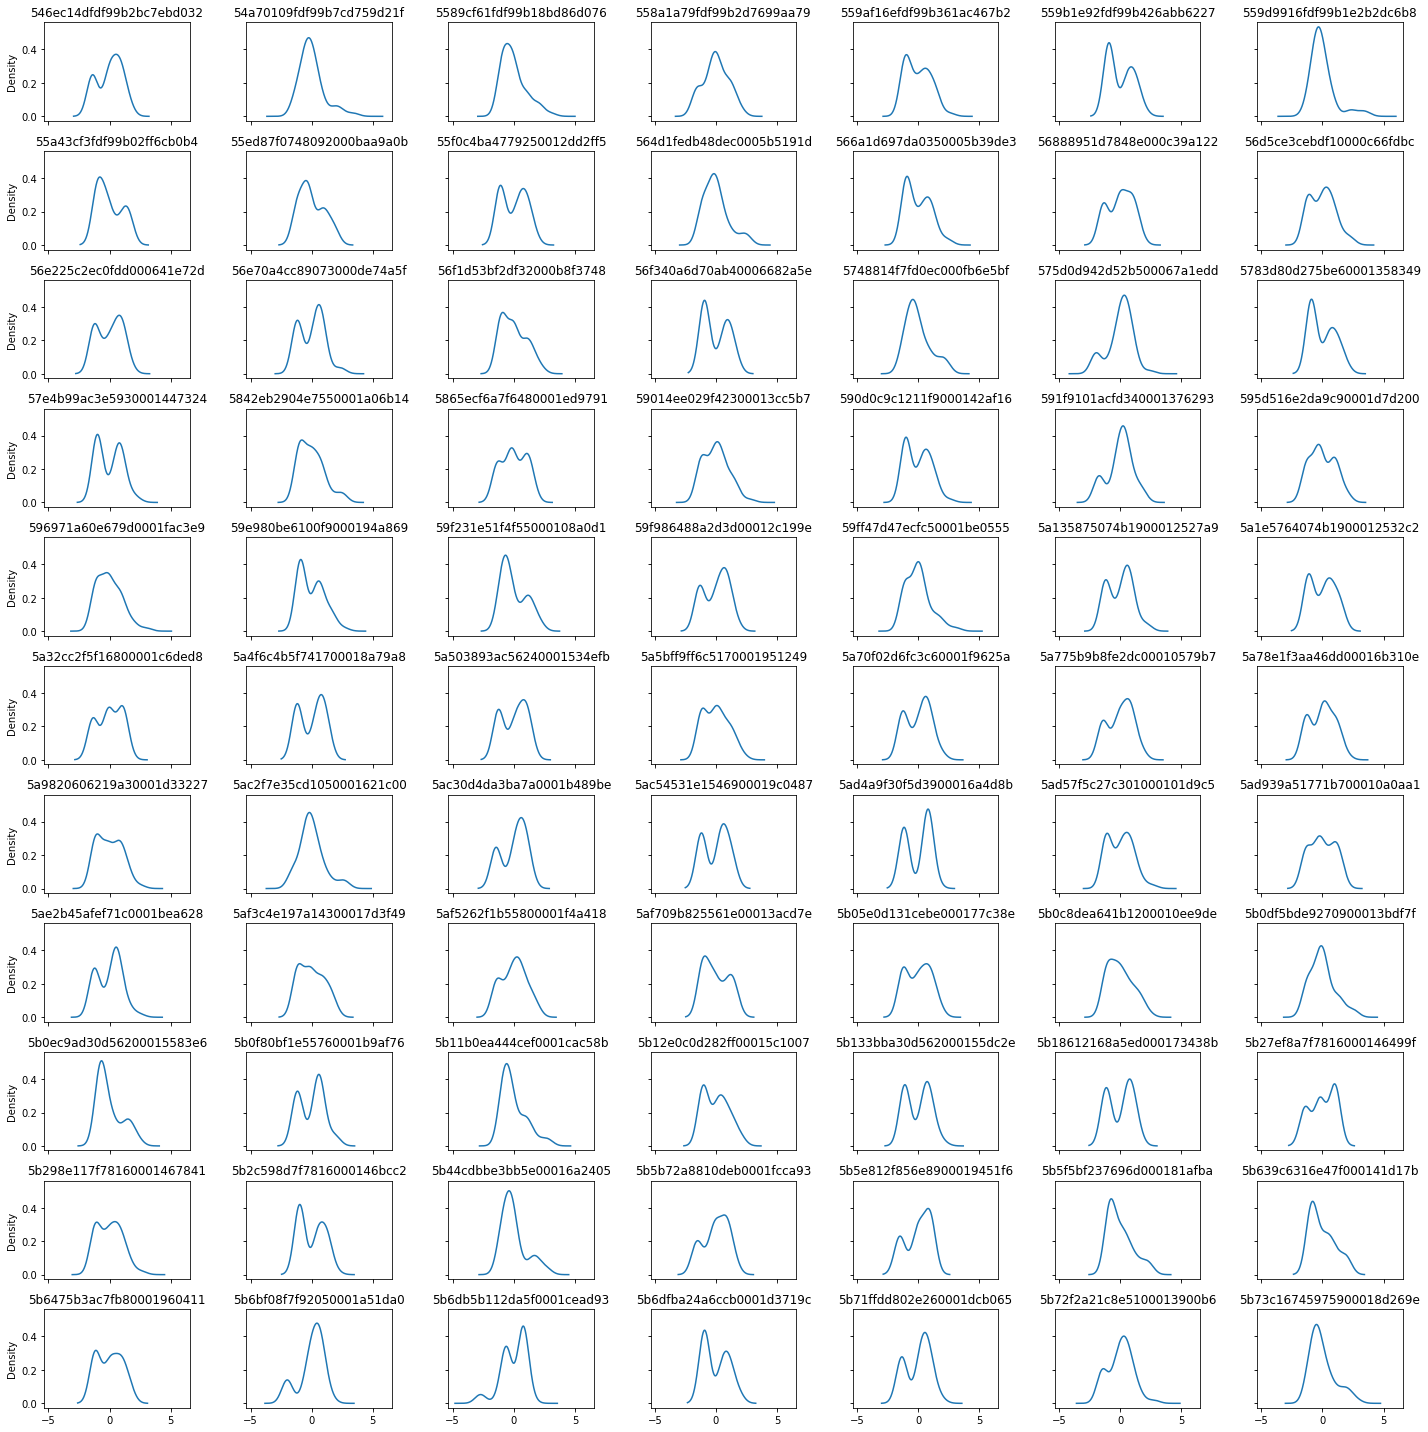

In [140]:
g = balloon.groupby('ProlificId').Zscore
n = g.ngroups
fig, axes = plt.subplots(n // 7,7, figsize=(20, 20), sharex=True, sharey=True)
for i, (name, group) in enumerate(g):
    r, c = i // 7, i % 7
    group.plot.kde(title=name, ax=axes[r, c])
fig.tight_layout()